In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [2]:
data = pd.read_csv('F:\School\College\AILab\JupyterNotebook\GIS\Glacier\XGBoost\XDem\XiZang_Kmeans_XDem_cluster0_point.csv')

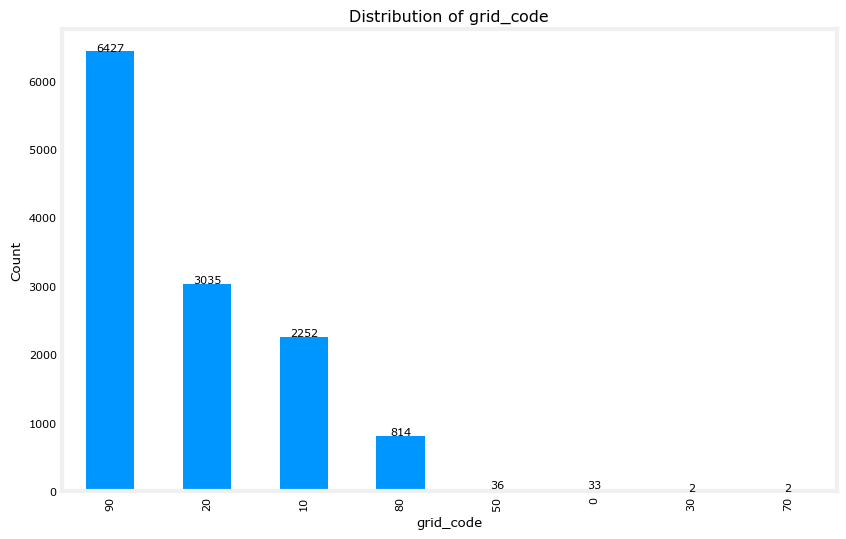

In [3]:
# Calculates the value count for the "grid_code" column
grid_code_counts = data['grid_code'].value_counts()

# A bar chart is drawn to show the distribution
plt.figure(figsize=(10, 6))
grid_code_counts.plot(kind='bar')
# Display labels on each post
for i, count in enumerate(grid_code_counts):
    plt.text(i, count + 10, str(count), ha='center')
plt.xlabel('grid_code')
plt.ylabel('Count')
plt.title('Distribution of grid_code')
plt.show()

In [4]:
X = data[['rain_nor', 'slope_nor', 'NDVI_nor', 'evp_nor', 'SSD_nor', 'GST_nor']]
y = data['Value']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 200)

In [7]:
# Learning curve
train_sizes, train_scores, val_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

In [8]:
# Calculate average accuracy and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

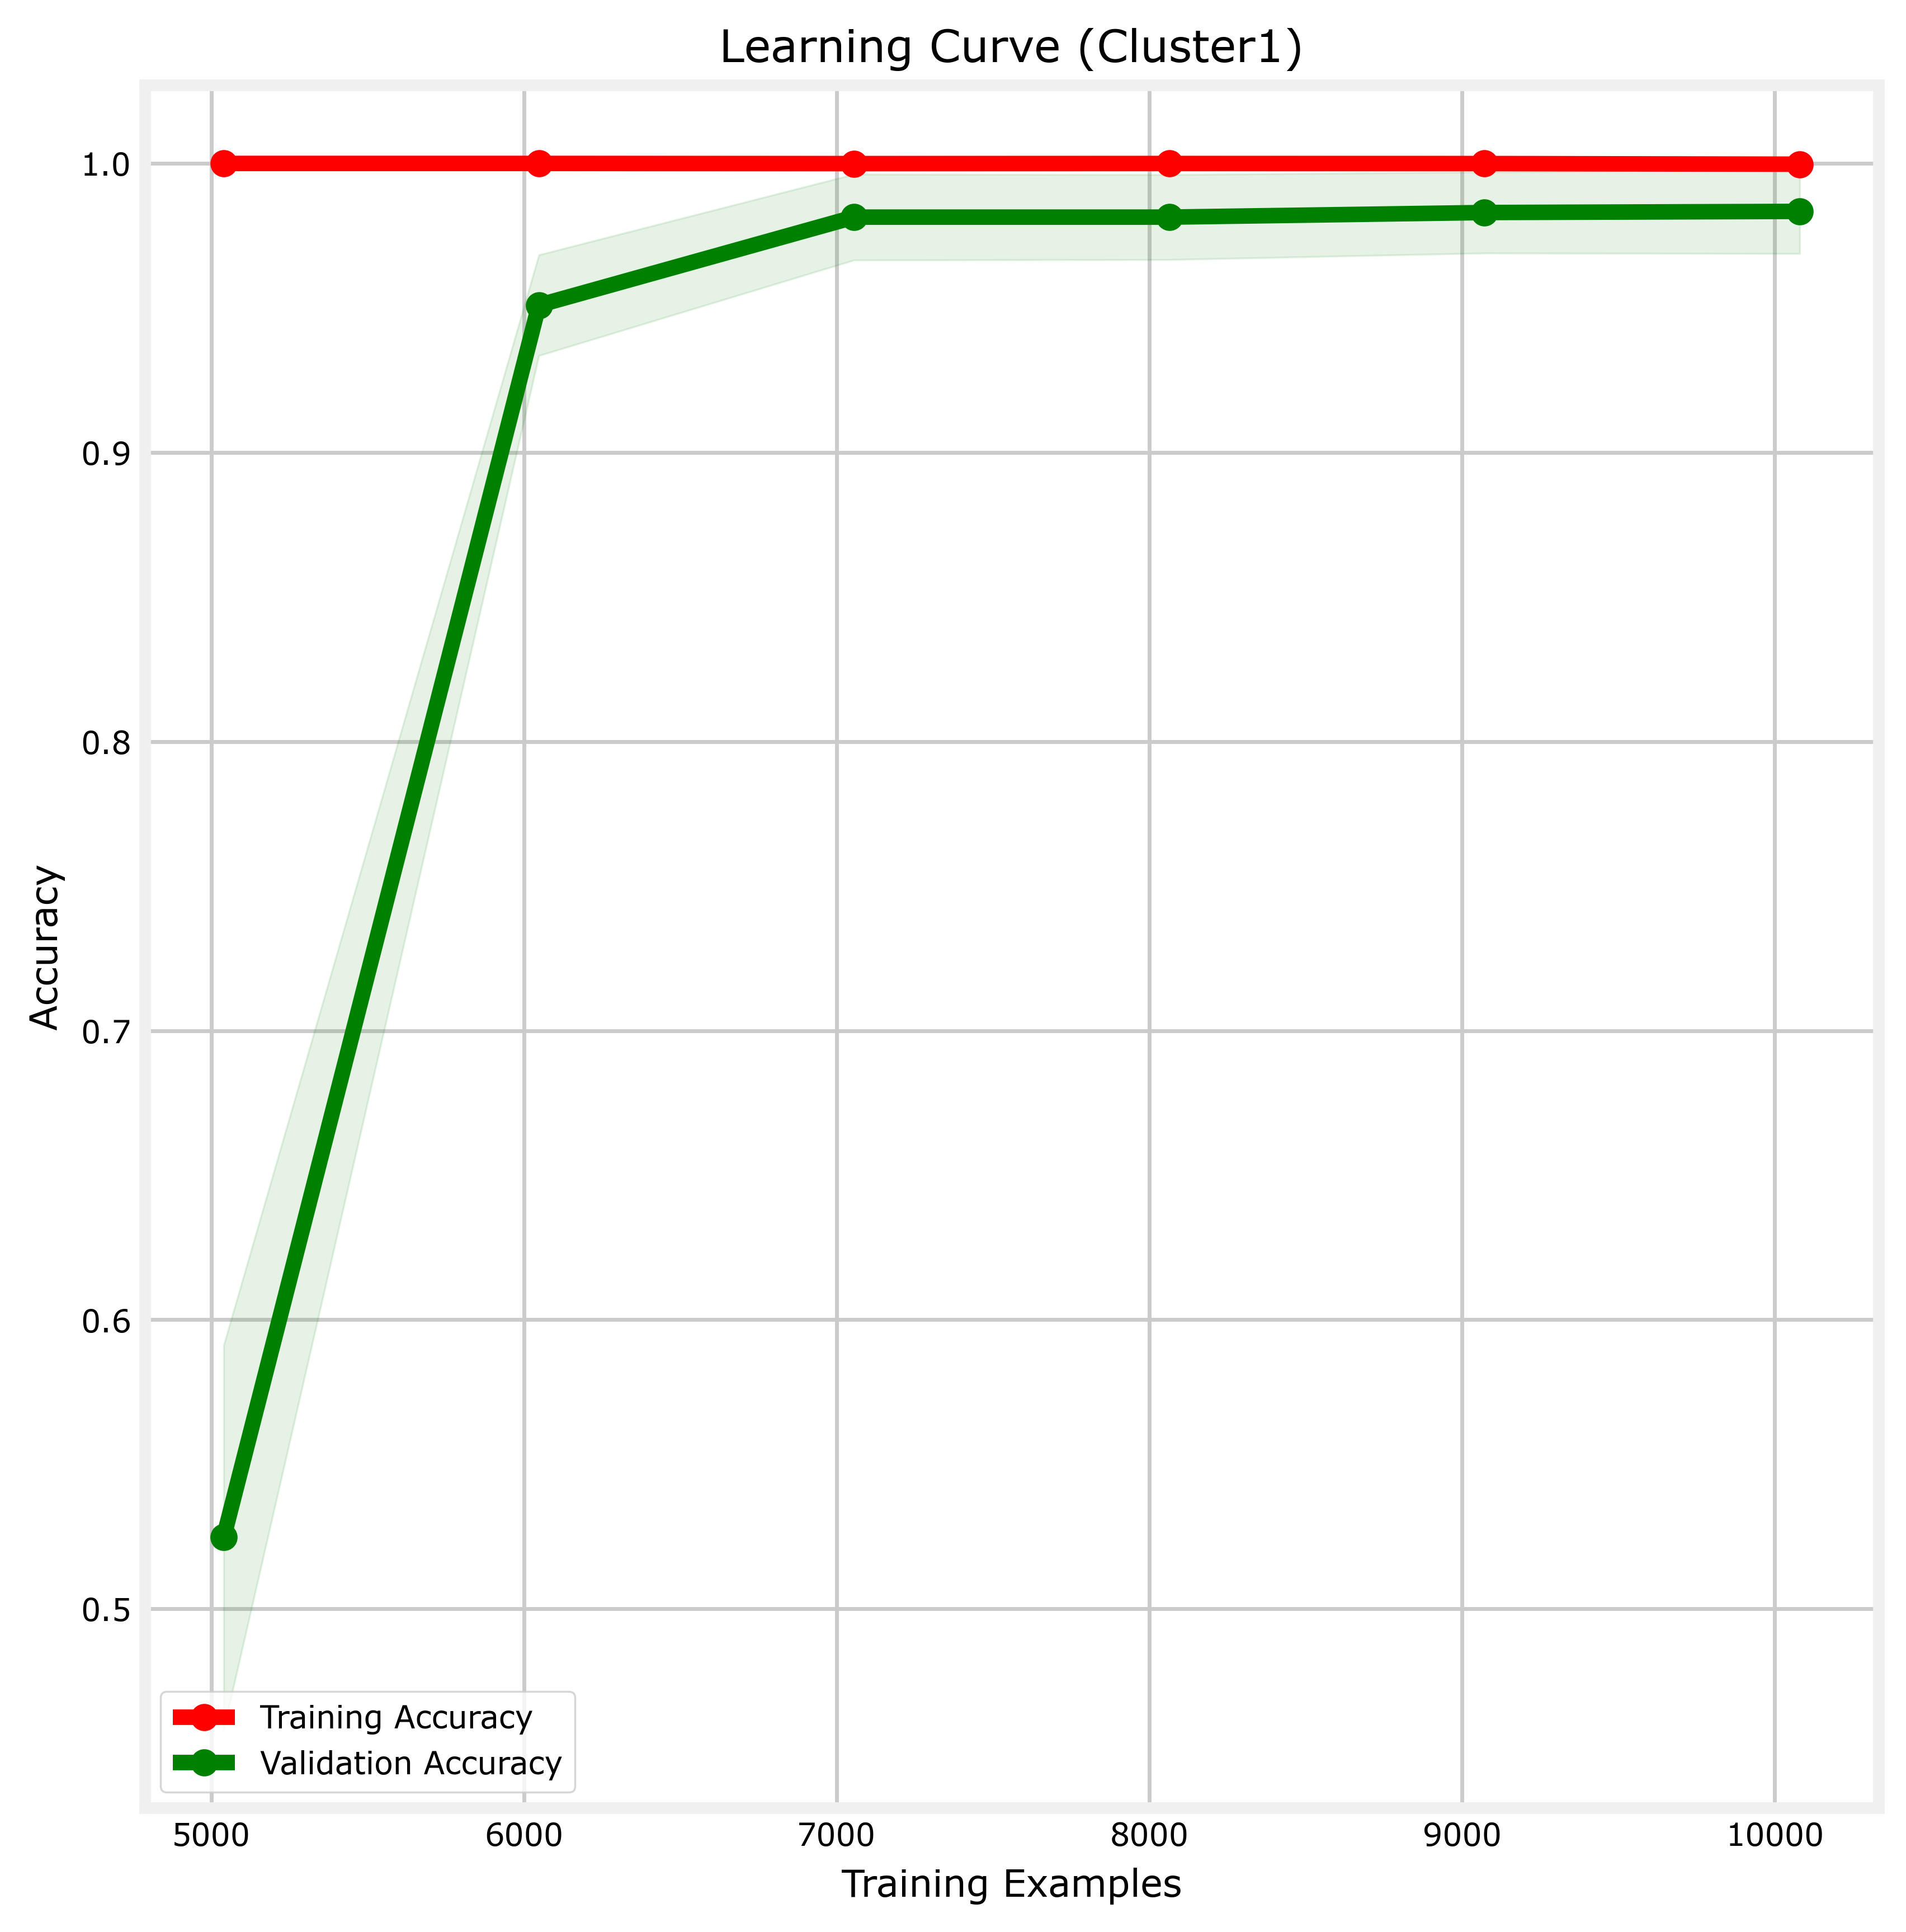

In [9]:
# Plot a learning curve
plt.figure(figsize=(8, 8), dpi=500)
plt.title("Learning Curve (Cluster1)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Accuracy")
plt.legend(loc="best")
plt.show()

In [10]:
# Cross-validation evaluates model performance
# cv_scores = cross_val_score(model, X_train, y_train, cv=10)  # Use 10 fold cross validation
# print("Cross-validation scores:", cv_scores)
# print("Mean accuracy:", cv_scores.mean())

In [11]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [12]:
model.best_iteration

199

In [13]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9980166600555335


In [14]:
f1 = f1_score(y_test, y_pred)
print("F1分数:", f1)

F1分数: 0.9980307207562032


In [15]:
# load shap
import shap
shap.initjs()

C:\ProgramData\Miniconda3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\ProgramData\Miniconda3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=1

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [16]:
# Create the SHAP interpreter
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


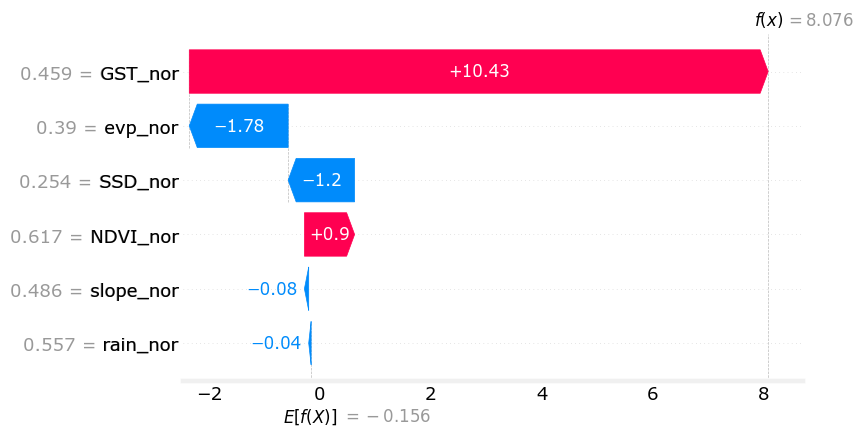

In [17]:
# Single sample characteristics affect waterfall
shap.plots.waterfall(shap_values[999])

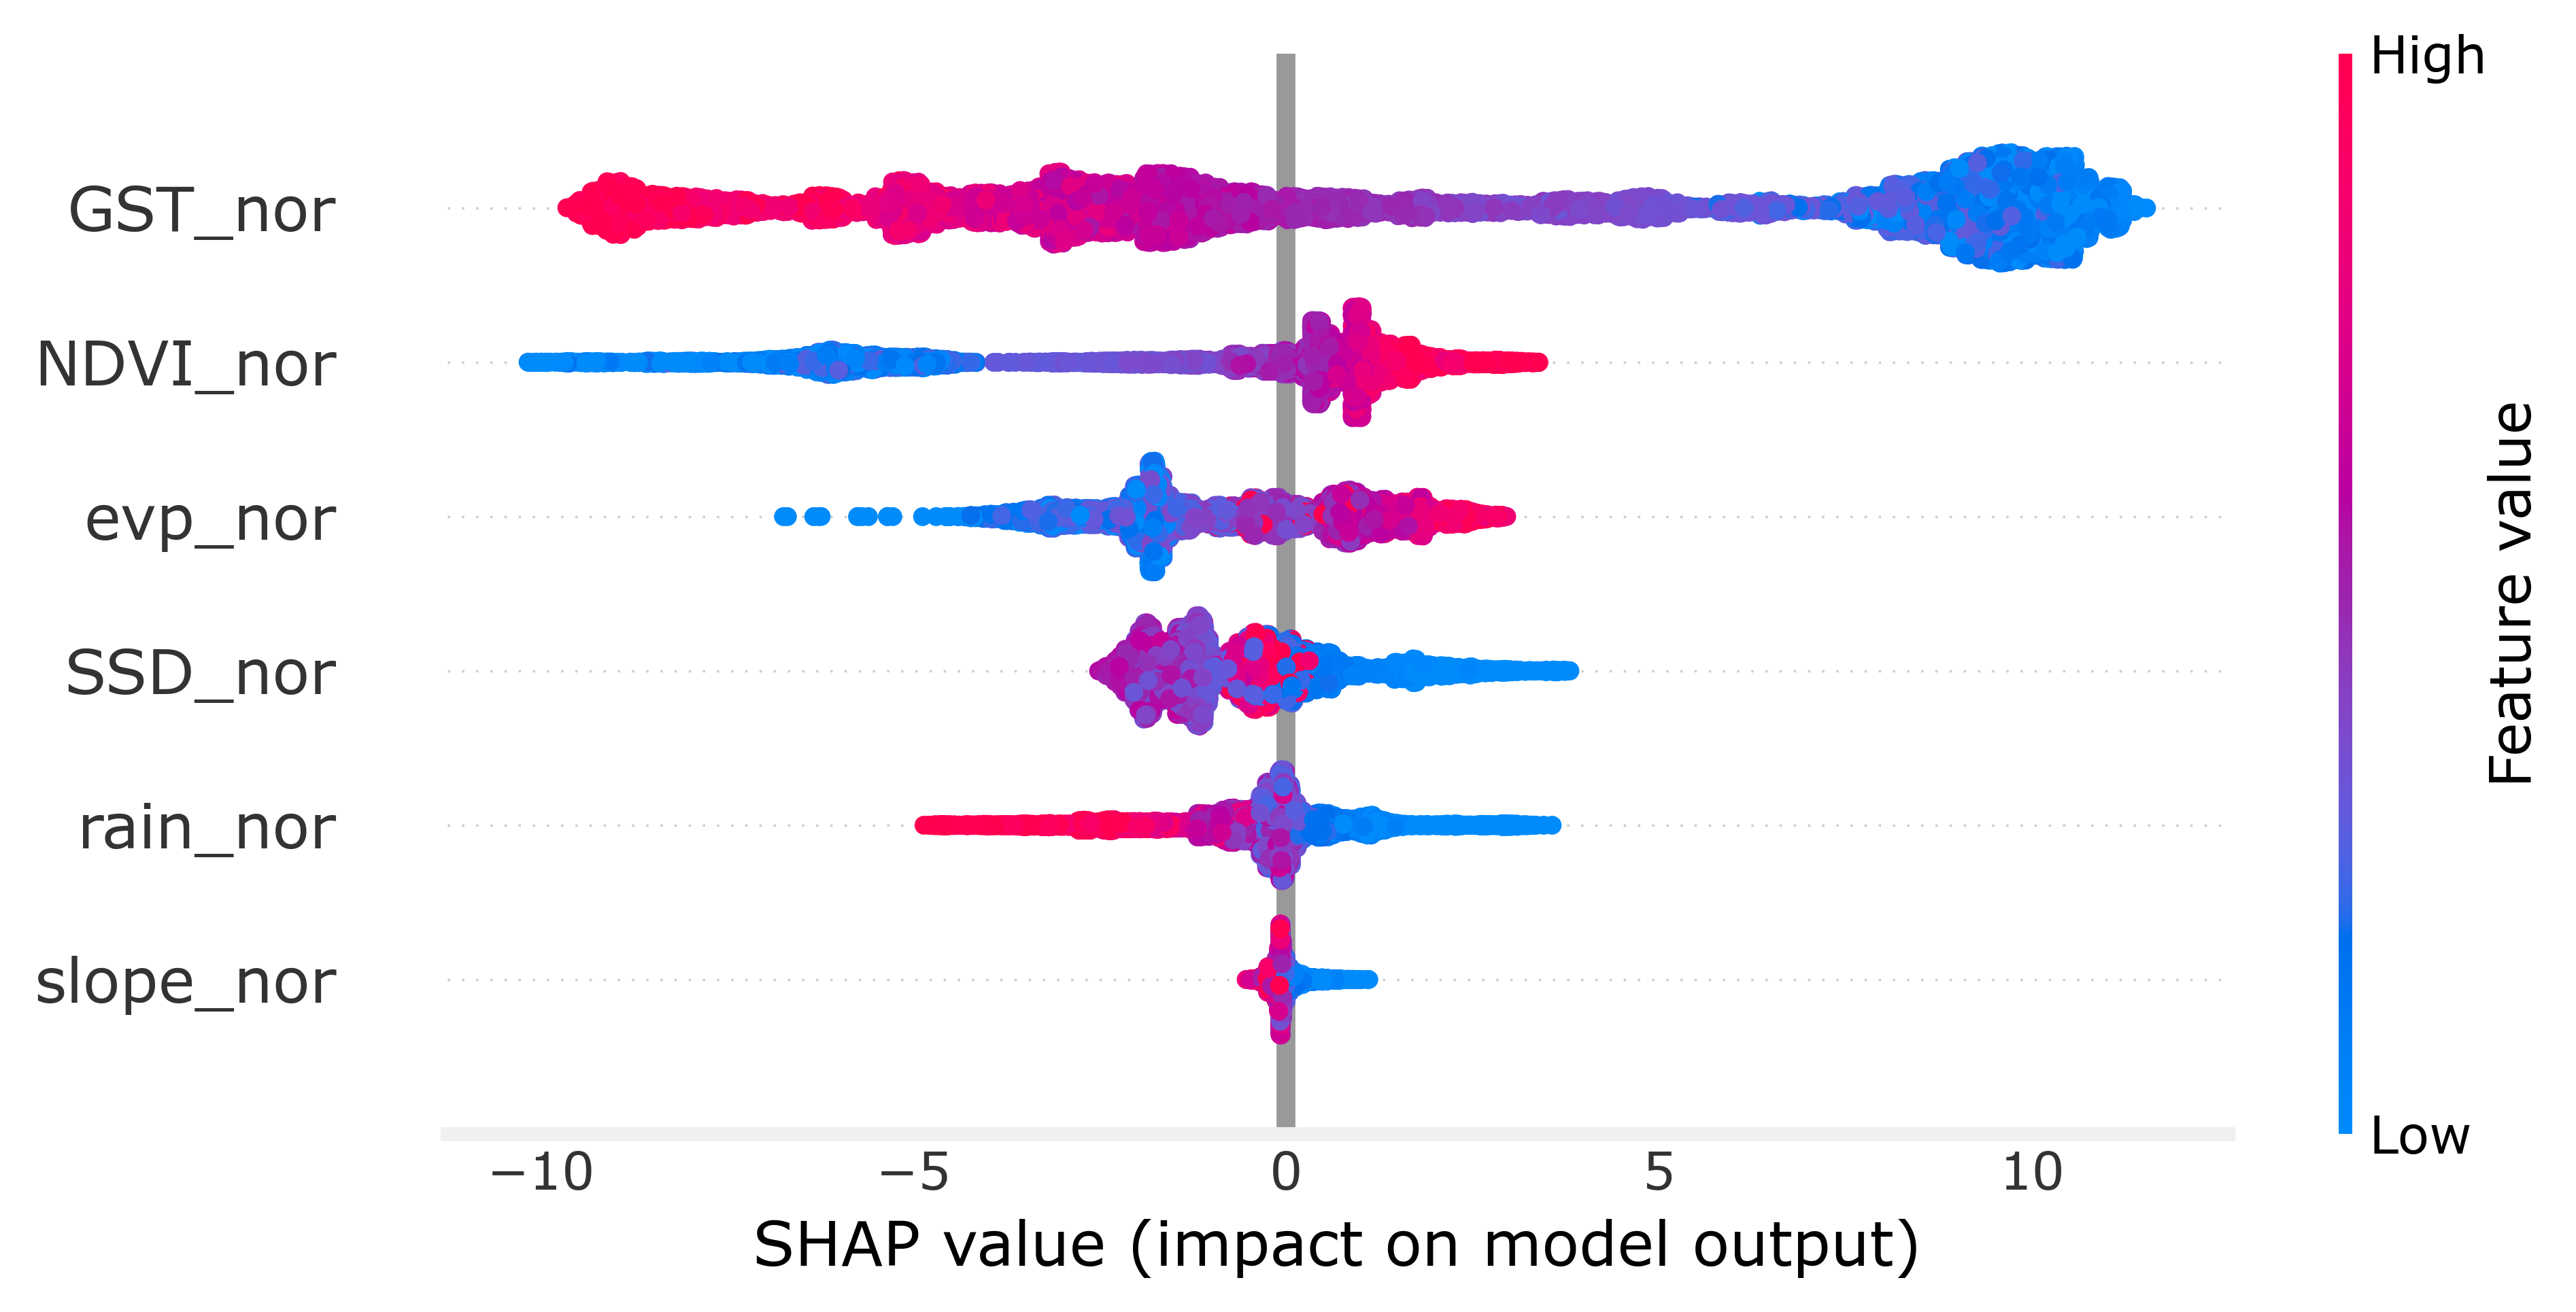

In [26]:
# Draw a SHAP summary diagram
plt.figure(dpi=500)
shap.summary_plot(shap_values, X)

In [40]:
# Calculate the median SHAP value for each feature
median_shap_values = np.median(shap_values.values, axis=0)

# Gets the index sorted by the size of the median SHAP value of the feature
sorted_indices = np.argsort(-np.abs(median_shap_values))  # The minus sign indicates descending order

# Output the feature name and the corresponding median SHAP value in order of the median SHAP value
print("Median SHAP values for each feature (sorted):")
for idx in sorted_indices:
    print(f"Feature {idx}: {median_shap_values[idx]}")

Median SHAP values for each feature (sorted):
Feature 4: -0.8814133405685425
Feature 5: 0.7807254195213318
Feature 3: -0.5363293886184692
Feature 2: 0.4353364408016205
Feature 0: -0.19240830838680267
Feature 1: -0.07596668601036072


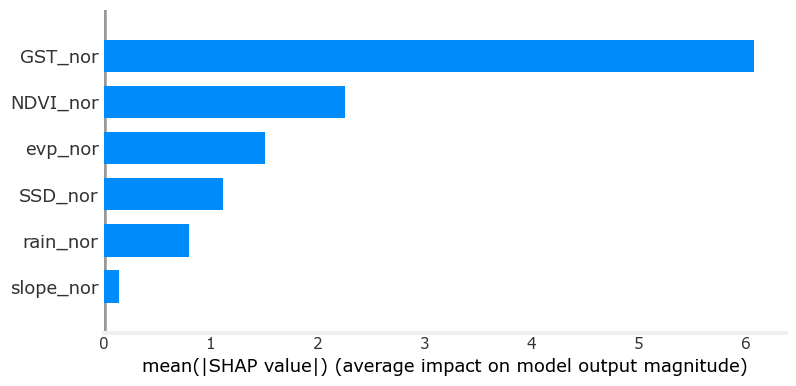

In [37]:
shap.summary_plot(shap_values, X, 
                  plot_type="bar")

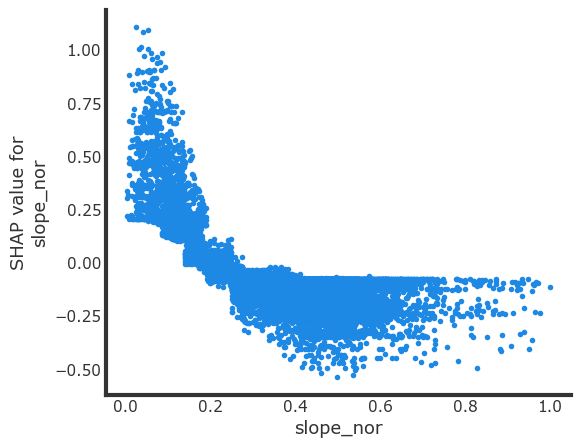

In [28]:
# Select the features for which you want to draw the dependency graph
feature_index = 1
feature_name = X.columns[feature_index]
# Draw a dependency diagram
shap.dependence_plot(feature_name, shap_values.values, X, interaction_index=None)

plt.show()

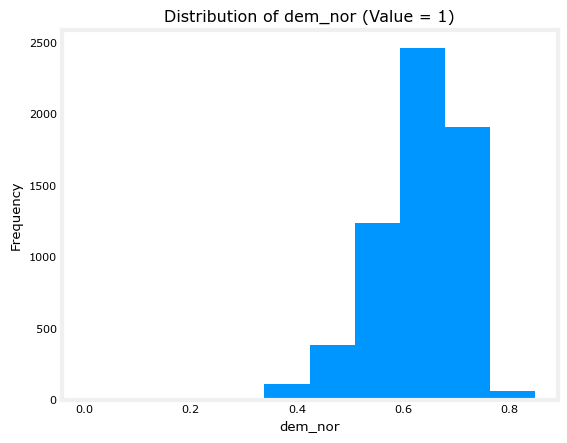

In [29]:
value_1_data = data[data['Value'] == 1]
dem_nor_value_1 = value_1_data['dem_nor']

plt.hist(dem_nor_value_1, bins=10)  # You can adjust the value of bins based on the data distribution
plt.xlabel('dem_nor')
plt.ylabel('Frequency')
plt.title('Distribution of dem_nor (Value = 1)')
plt.show()

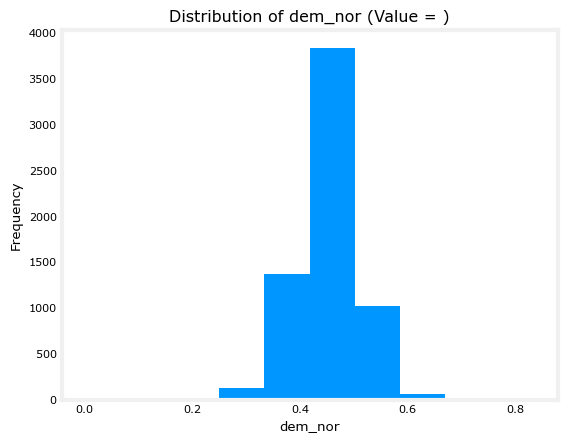

In [30]:
value_1_data = data[data['Value'] == 0]
dem_nor_value_1 = value_1_data['dem_nor']

plt.hist(dem_nor_value_1, bins=10)  # You can adjust the value of bins based on the data distribution
plt.xlabel('dem_nor')
plt.ylabel('Frequency')
plt.title('Distribution of dem_nor (Value = )')
plt.show()